# Project 3 - Analyzing Student Performance


We will be using the [UCI ML Student Performance dataset](https://archive.ics.uci.edu/ml/datasets/Student+Performance). This dataset collects various attributes from two schools in Portugal and gathers student performance.

In [67]:
# YOUR CODE HERE
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

pd.set_option("display.max_rows", 15, "display.max_columns", None)
df_mat = pd.read_csv('student-mat.csv', sep = ';')
df_por = pd.read_csv('student-por.csv', sep = ';')

In [68]:
df_mat

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


In [69]:
df_por

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10


As we can see, there are two datasets here. df_mat is the performance of these students in Math class while df_por is their performance in Portuguese class.

We can start cleaning our data by renaming the columns to be a lot more clear as to what they contain.

In [70]:
df_por = df_por.rename(columns={"school":"School", "sex":"Sex", "age":"Age","address":"addressType","famsize":"famSize","Pstatus":"parentCohabitation", "Medu":"momEducation", "Fedu":"dadEducation", "Mjob":"momJob","Fjob":"dadJob","reason":"schoolReason","guardian":"Guardian","traveltime":"schoolCommuteTime","studytime":"wklyStudyTime","failures":"pastFailures","schoolsup":"schoolSupport","famsup":"familySupport","paid":"extraPaidClasses","activities":"extraActivities","nursery":"nurserySchool","higher":"pursueHigherEdu","internet":"internetAccess","romantic":"inRelationsip","famrel":"familyRelQuality","freetime":"freeTime","goout":"outWithFriends","Dalc":"workdayAlcoholConsumption","Walc":"weekendAlcoholConsumption", "health":"healthStatus","absences":"schoolAbsences", "G1":"firstPeriodGrade", "G2":"secondPeriodGrade", "G3":"finalGrade"})
#df_por.drop(['famSize','parentCohabitation','momJob','dadJob','nurserySchool'], axis=1, inplace=True)
df_por

,School,Sex,Age,addressType,famSize,parentCohabitation,momEducation,dadEducation,momJob,dadJob,schoolReason,Guardian,schoolCommuteTime,wklyStudyTime,pastFailures,schoolSupport,familySupport,extraPaidClasses,extraActivities,nurserySchool,pursueHigherEdu,internetAccess,inRelationsip,familyRelQuality,freeTime,outWithFriends,workdayAlcoholConsumption,weekendAlcoholConsumption,healthStatus,schoolAbsences,firstPeriodGrade,secondPeriodGrade,finalGrade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10


In [71]:
df_mat = df_mat.rename(columns={"school":"School", "sex":"Sex", "age":"Age","address":"addressType","famsize":"famSize","Pstatus":"parentCohabitation", "Medu":"momEducation", "Fedu":"dadEducation", "Mjob":"momJob","Fjob":"dadJob","reason":"schoolReason","guardian":"Guardian","traveltime":"schoolCommuteTime","studytime":"wklyStudyTime","failures":"pastFailures","schoolsup":"schoolSupport","famsup":"familySupport","paid":"extraPaidClasses","activities":"extraActivities","nursery":"nurserySchool","higher":"pursueHigherEdu","internet":"internetAccess","romantic":"inRelationsip","famrel":"familyRelQuality","freetime":"freeTime","goout":"outWithFriends","Dalc":"workdayAlcoholConsumption","Walc":"weekendAlcoholConsumption", "health":"healthStatus","absences":"schoolAbsences", "G1":"firstPeriodGrade", "G2":"secondPeriodGrade", "G3":"finalGrade"})
#df_mat.drop(['famSize','parentCohabitation','momJob','dadJob','nurserySchool'], axis=1, inplace=True)
df_mat

,School,Sex,Age,addressType,famSize,parentCohabitation,momEducation,dadEducation,momJob,dadJob,schoolReason,Guardian,schoolCommuteTime,wklyStudyTime,pastFailures,schoolSupport,familySupport,extraPaidClasses,extraActivities,nurserySchool,pursueHigherEdu,internetAccess,inRelationsip,familyRelQuality,freeTime,outWithFriends,workdayAlcoholConsumption,weekendAlcoholConsumption,healthStatus,schoolAbsences,firstPeriodGrade,secondPeriodGrade,finalGrade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


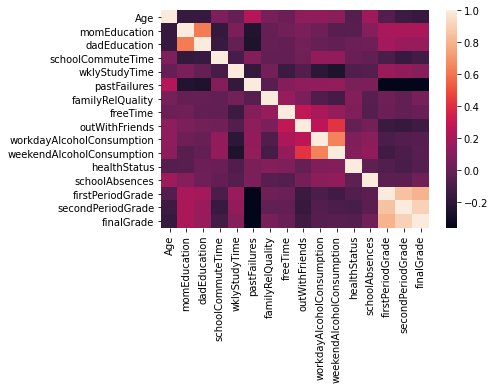

In [72]:
corr = df_mat.corr()
sns.heatmap(corr)

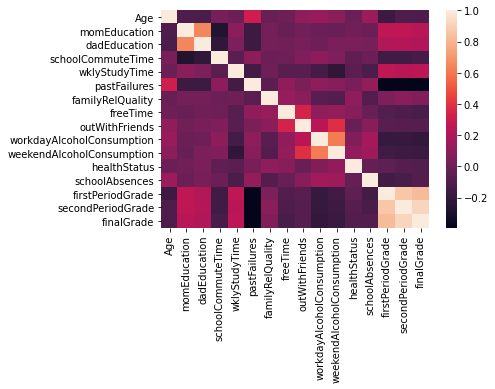

In [73]:
corr2 = df_por.corr()
sns.heatmap(corr2)

Created visualization for the correlation between student's educational success and parents' education levels
AxesSubplot(0.125,0.125;0.775x0.755) Correlation value is: 0.20522443411453908


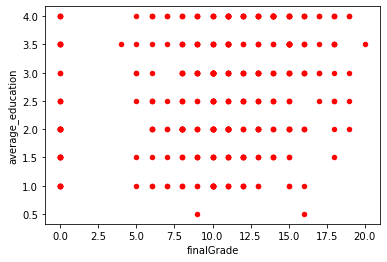

In [74]:
print("Created visualization for the correlation between student's educational success and parents' education levels")
sum_column = df_mat["dadEducation"] + df_mat["momEducation"]
sum_column = sum_column/2
df_mat['average_education'] = sum_column
correlation = df_mat['finalGrade'].corr(df_mat['average_education'])
print (df_mat.plot.scatter(x='finalGrade', y='average_education', c='Red'), "Correlation value is:", correlation)
df_mat.drop(df_mat.columns[len(df_mat.columns)-1], axis=1, inplace=True)


In [75]:
print("Would a successful student reside in an urban or rural location")
means_by_location = df_mat.groupby('addressType')['finalGrade'].mean()
means_by_location_2 = df_por.groupby('addressType')['finalGrade'].mean()
print (means_by_location, '\n\n\n',  means_by_location_2)


Would a successful student reside in an urban or rural location
addressType
R     9.511364
U    10.674267
Name: finalGrade, dtype: float64 


 addressType
R    11.086294
U    12.263274
Name: finalGrade, dtype: float64


From the averages test, it looks like students in both classes seem to have higher grades if they are from a urban address. This test was computed by running the means based on the address type of each table. 

In [92]:
#df_mat.loc[['firstPeriodGrade','secondPeriodGrade', 'finalGrade']].plot.bar()
cr = df_mat['firstPeriodGrade'].corr(df_mat['secondPeriodGrade'])
cr2 = df_mat['secondPeriodGrade'].corr(df_mat['finalGrade'])
print (cr,',', cr2)

0.8521180663648064 , 0.9048679892693011


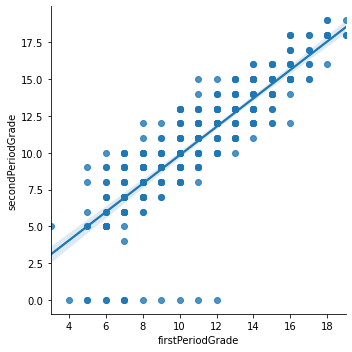

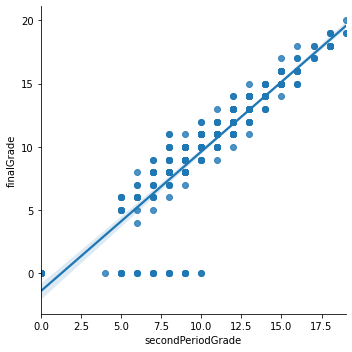

In [97]:
sns.lmplot(x='firstPeriodGrade',y='secondPeriodGrade',data=df_mat,fit_reg=True) 
sns.lmplot(x='secondPeriodGrade',y='finalGrade',data=df_mat,fit_reg=True) 

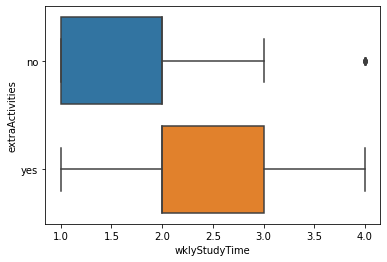

In [107]:
sns.boxplot(x="wklyStudyTime", y="extraActivities", data=df_mat)